### Import the libraries adn load the MINIS Dataset


In [2]:
!pip install keras


  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/46/43/03fa53f027e78af4a6bee3564d05cb34d9f5b924dc69c85f8ef5cb950ff1/keras-3.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for absl-py from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for namex from https://files.pythonhosted.org/packages/73/59/7854fbfb59f8ae35483ce93493708be5942ebb6328cd85b3a609df629736/namex-0.0.8-py3-none-any.whl.metadata
  Obtaining dependency information for optree from https://files.pythonhosted.org/packages/12/26/ce14a11c328bfcf29341da42342cc48e4d65fb44e4e559c9e4036a88b750/optree-0.12.1-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     -------- ------------------------------- 10.2/48.7 kB ? eta -:--:--
     -------- ------------------------------- 10.2/48.7 kB 

In [7]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/ed/b6/62345568cd07de5d9254fcf64d7e44aacbb6abde11ea953b3cb320e58d19/tensorflow-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.17.0 from https://files.pythonhosted.org/packages/66/03/5c447feceb72f5a38ac2aa79d306fa5b5772f982c2b480c1329c7e382900/tensorflow_intel-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=24.3.25 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2dbd0ad4182ef2d53488bb02e58694cd79d61369e85900/flatbuffers-24.3.25-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 from https://files.pythonhosted.org/p

In [15]:
!pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/ec/6c/fab8113424af5049f85717e8e527ca3773299a3c6b02506e66436e19874f/opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 991.0 kB/s eta 0:00:40
   ---------------------------------------- 0.1/38.8 MB 1.7 MB/s eta 0:00:23
   ---------------------------------------- 0.3/38.8 MB 2.3 MB/s eta 0:00:18
   ---------------------------------------- 0.4/38.8 MB 2.5 MB/s eta 0:00:16
    --------------------------------------- 0.7/38.8 MB 3.3 MB/s eta 0:00:12
    --------------------------------------- 0.9/38.8 MB 4.0 MB/s eta 0:00:10
   - -------------------------------------- 1.3/38.8 MB 4.4 MB/s eta 0:00:09
   - -------------------------------------- 1.6/38.8 MB 4.8 MB/s eta 0:00:08
   - ---------------

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from keras import backend as K
import numpy 
import pandas as pd
import matplotlib.pyplot as plt


In [14]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

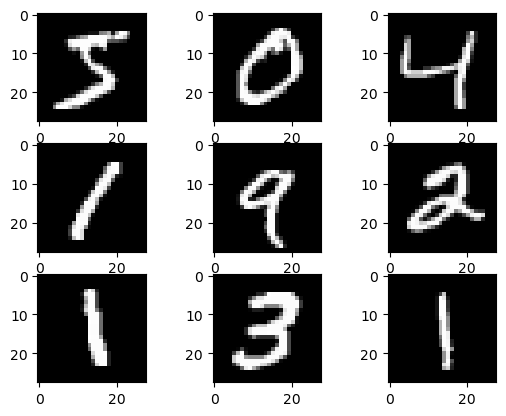

In [15]:
#plot first nine samples of MNIST training datasets, as grey scale image
for i in range(9):
    plt.subplot(int('33' + str(i + 1)))
    plt.imshow(X_train[i], cmap = plt.get_cmap('gray'))

### Data preprocess and Normalize

In [16]:
# Preprocess the data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# Convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [17]:
def create_model():
    input_shape = (28, 28, 1)  # Define the input shape
    num_classes = 10
    
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

# Build the model
model = create_model()



In [19]:

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model and save the training history
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=1)
print("The model has successfully trained")

# Save the model
model.save("mnist_cnn_model.h5")
print("The model has been saved")

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 51s 161ms/step - accuracy: 0.9320 - loss: 0.2381 - val_accuracy: 0.9841 - val_loss: 0.0487
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 49s 162ms/step - accuracy: 0.9749 - loss: 0.0866 - val_accuracy: 0.9869 - val_loss: 0.0396
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 49s 162ms/step - accuracy: 0.9809 - loss: 0.0661 - val_accuracy: 0.9879 - val_loss: 0.0361
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 48s 160ms/step - accuracy: 0.9844 - loss: 0.0508 - val_accuracy: 0.9899 - val_loss: 0.0311
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 48s 161ms/step - accuracy: 0.9862 - loss: 0.0441 - val_accuracy: 0.9909 - val_loss: 0.0270
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 50s 167ms/step - accuracy: 0.9889 - loss: 0.0345 - val_accuracy: 0.9917 - val_loss: 0.0258
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 50s 168ms/step - accuracy: 0.9892 - loss: 0.0336 - val_accuracy: 0.9916 - val_loss: 0.0268
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 49s 162ms/step - accuracy: 0.9913 - loss: 0

The model has successfully trained
The model has been saved


In [5]:
# Build the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {test_acc:.4f}')

# Save the model
model.save("mnist_cnn_model.keras")
print("The model has been saved")

Epoch 1/10


C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.8025 - loss: 0.6495 - val_accuracy: 0.9671 - val_loss: 0.1150
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9565 - loss: 0.1469 - val_accuracy: 0.9772 - val_loss: 0.0786
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9692 - loss: 0.1056 - val_accuracy: 0.9800 - val_loss: 0.0657
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9736 - loss: 0.0863 - val_accuracy: 0.9818 - val_loss: 0.0610
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9771 - loss: 0.0722 - val_accuracy: 0.9835 - val_loss: 0.0554
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9813 - loss: 0.0651 - val_accuracy: 0.9845 - val_loss: 0.0520
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9811 - loss: 0.0627 - val_accuracy: 0.9857 - val_loss: 0.0508
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9831 - loss: 0.0535 - val_accuracy:

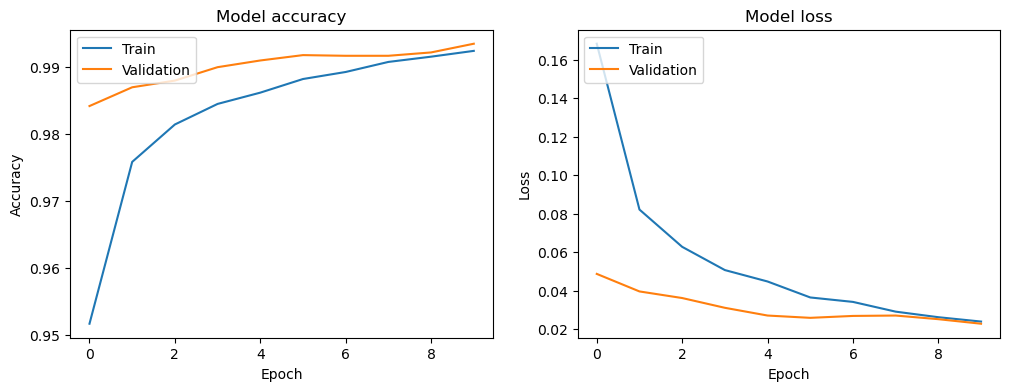

In [20]:
# Plot the training and validation loss and accuracy
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss value
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

# Show the plots
plt.show()

### Evaluate the model


In [21]:
#Evaluate the model
scores = model.evaluate(X_test,y_test,verbose=0)
print(" Error : %.2f%%" % (100-scores[1] * 100))

 Error : 0.66%


### Create GUI to Predit digits -TK()

In [22]:
import tkinter as tk
from tkinter import Canvas, Button, Label, ROUND
from PIL import Image, ImageGrab, ImageOps
import numpy as np
import cv2
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('mnist_cnn_model.h5')

# Initialize variables
lastx, lasty = None, None
image_number = 0

# Function to load and preprocess the image
def load_image(img_path):
    img = Image.open(img_path).convert('L')
    img = ImageOps.invert(img)
    img = img.resize((28, 28))
    img = np.array(img)
    img = img.astype('float32') / 255
    img = np.expand_dims(img, axis=-1)
    img = np.expand_dims(img, axis=0)
    return img

# Function to clear the canvas
def clear_widget():
    global cv, draw
    cv.delete("all")
    draw.rectangle((0, 0, 640, 480), fill='white')

# Function to activate event on canvas click
def activate_event(event):
    global lastx, lasty
    cv.bind('<B1-Motion>', draw_lines)
    lastx, lasty = event.x, event.y

# Function to draw lines
def draw_lines(event):
    global lastx, lasty
    x, y = event.x, event.y
    cv.create_line((lastx, lasty, x, y), width=8, fill='black', capstyle=ROUND, smooth=tk.TRUE, splinesteps=12)
    draw.line([lastx, lasty, x, y], fill='black', width=8)
    lastx, lasty = x, y

# Function to recognize digit drawn on canvas
def Recognize_digit():
    global image_number
    filename = f'image_{image_number}.png'
    widget = cv

    # Get the widget coordinates
    x = root.winfo_rootx() + widget.winfo_x()
    y = root.winfo_rooty() + widget.winfo_y()
    x1 = x + widget.winfo_width()
    y1 = y + widget.winfo_height()

    # Grab the image, crop it according to requirement, and save it in png format
    ImageGrab.grab().crop((x, y, x1, y1)).save(filename)

    # Load and preprocess the image using OpenCV
    image = cv2.imread(filename, cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, th = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    contours = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 1)
        top = int(0.05 * th.shape[0])
        bottom = top
        left = int(0.05 * th.shape[1])
        right = left
        th_up = cv2.copyMakeBorder(th, top, bottom, left, right, cv2.BORDER_REPLICATE)
        roi = th[y - top:y + h + bottom, x - left:x + w + right]
        img = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
        img = img.reshape(1, 28, 28, 1)
        img = img / 255.0
        pred = model.predict([img])[0]
        final_pred = np.argmax(pred)
        data = str(final_pred) + ' ' + str(int(max(pred) * 100)) + '%'
        font = cv2.FONT_HERSHEY_SIMPLEX
        fontScale = 0.5
        color = (255, 0, 0)
        thickness = 1
        cv2.putText(image, data, (x, y - 5), font, fontScale, color, thickness)

    cv2.imshow('image', image)
    cv2.waitKey(0)

# Set up the GUI
root = tk.Tk()
root.title("Digit Prediction GUI")

# Create a canvas for drawing
cv = Canvas(root, width=640, height=480, bg='white')
cv.grid(row=0, column=0, pady=2, sticky='w', columnspan=2)

# Create a blank image and a drawing context
from PIL import ImageDraw
image = Image.new('RGB', (640, 480), 'white')
draw = ImageDraw.Draw(image)

# Bind mouse click event to canvas
cv.bind('<Button-1>', activate_event)

# Add buttons and labels
btn_save = Button(root, text="Recognize Digit", command=Recognize_digit)
btn_save.grid(row=2, column=0, pady=1, padx=1)

button_clear = Button(root, text="Clear Widget", command=clear_widget)
button_clear.grid(row=2, column=1, pady=1, padx=1)

result_label = Label(root, text="Predicted Digit: None")
result_label.grid(row=3, column=0, columnspan=2, pady=10)

# Start the Tkinter event loop
root.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
